<a href="https://colab.research.google.com/github/SurajGusain0007/Machine_learning_projects_with_Suraj/blob/main/Salary_Prediction(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Basic Libraries**

In [104]:
import pandas as pd
import numpy as np

**Load the dataset**

In [105]:
df=pd.read_csv("Salary_data.csv")

**Check the shape of DataFrame**

In [106]:
df.shape

(30, 2)

**VIEW FIRST FIVE OF Dataframe**

In [107]:
df.head()

,YearS of experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,47896
4,2.2,49000


**View last 5 rows of Dataframe**

In [108]:
df.tail()

,YearS of experience,Salary
25,9.5,113812
26,10.3,109431
27,10.5,105582
28,9.6,99222
29,6.3,70500


**View random sample of data**

In [109]:
df.sample(5)

,YearS of experience,Salary
3,2.0,47896
29,6.3,70500
27,10.5,105582
24,9.0,101302
7,3.2,54445


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearS of experience  30 non-null     float64
 1   Salary               30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


**Check the datatype of Features**

In [111]:
df.dtypes

YearS of experience    float64
Salary                   int64
dtype: object

**Change the datatype of Salary**

**DESCRIBE THE Dataframe Stastically**

In [112]:
df.describe()

,YearS of experience,Salary
count,30.000000,30.000000
mean,5.360000,70281.233333
std,2.842364,21844.611471
min,1.100000,37731.000000
25%,3.200000,56006.000000
50%,4.800000,63218.000000
75%,7.700000,89575.500000
max,10.500000,113812.000000


**Change the Datatype**

In [113]:
df['Salary']=df['Salary'].astype(float)

# Data Cleaning

**Drop the duplicates**

In [114]:
df.shape

(30, 2)

In [115]:
df.duplicated().any()

False

In [116]:
df=df.drop_duplicates()


In [117]:
df.shape

(30, 2)

**Check the null values**

In [118]:
df.isnull().sum()

YearS of experience    0
Salary                 0
dtype: int64

**Data Visulization before the Train Model**

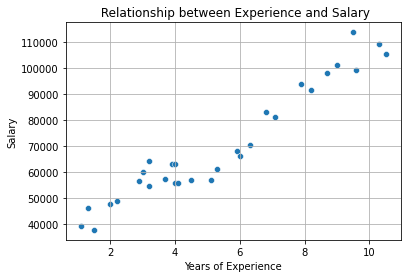

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['YearS of experience'],y=df['Salary'])
plt.title(" Relationship between Experience and Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid()
plt.show()

**Split Dataset to train and test**

In [122]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [129]:
x_train.shape,y_train.shape

((24, 1), (24,))

In [130]:
x_test.shape,y_test.shape

((6, 1), (6,))

**Apply linear Regression on Train Dataset**

In [131]:
from sklearn.linear_model import LinearRegression

In [133]:
reg=LinearRegression()

In [135]:
reg.fit(x_train,y_train)

LinearRegression()

**Get The Parameters**

In [137]:
reg.intercept_
print("intercept(b) is",reg.intercept_)

intercept(b) is 31667.457807305465


In [138]:
reg.coef_
print("coefficient(m) is",reg.coef_)

coefficient(m) is [7203.59487438]


**Apply the model on test Dataset to get the predict values**

In [140]:
y_pred=reg.predict(x_test)
y_pred

array([ 42472.85011888, 100821.9686014 ,  61202.19679228,  59761.47781741,
       105864.48501347,  96499.81167677])

**To Compare the actual output values with the predict values**

In [142]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred,'variance':y_test-y_pred})

In [143]:
df1

,Actual,Predicted,variance
0,37731.0,42472.850119,-4741.850119
1,99222.0,100821.968601,-1599.968601
2,55794.0,61202.196792,-5408.196792
3,63218.0,59761.477817,3456.522183
4,109431.0,105864.485013,3566.514987
5,101302.0,96499.811677,4802.188323


**Prediction**

In [147]:
pred=np.array([1.5]).reshape(-1,1)

In [148]:
reg.predict(pred)

array([42472.85011888])

**Visulization**

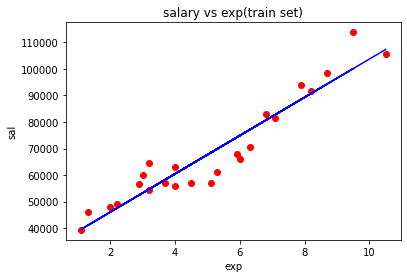

In [149]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.title("salary vs exp(train set)")
plt.xlabel("exp")
plt.ylabel("sal")
plt.show()

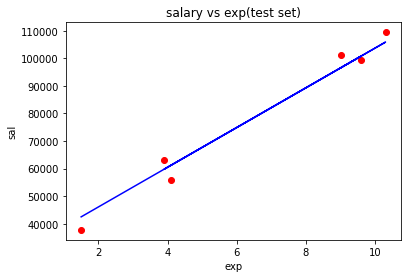

In [151]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,reg.predict(x_test),color='blue')
plt.title("salary vs exp(test set)")
plt.xlabel("exp")
plt.ylabel("sal")
plt.show()

**Evalution metrices of regression algorithm**

In [153]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
print("score",score)

score 97.63519296776448


In [154]:
from sklearn import metrics
print("mae",metrics.mean_absolute_error(y_test,y_pred))
print('mse',metrics.mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mae 3929.2068341539307
mse 17003703.6765319
rmse 4123.554737909017
